In [ ]:
!apt-get install python-vtk
!apt-get install vtk6


# !pip install mayavi

Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package python-vtk
Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package vtk6
Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package python-vtk


In [ ]:
!pip install wxPython

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.7/73.7 MB 10.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for wxPython
  Running setup.py clean for wxPython
Failed to build wxPython
ERROR: Could not build wheels for wxPython, which is required to install pyproject.toml-based projects


In [ ]:
import numpy as np
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from mayavi import mlab
# from pyntcloud import PyntCloud

# Set paths for dataset
dataset_path = '/content/drive/MyDrive/Colab Notebooks/188'
point_clouds_path = os.path.join(dataset_path, 'stage3_training')
labels_path = os.path.join(dataset_path, 'stage3_train_labels')

# Preprocessing parameters
test_size = 0.2  # 20% of data will be used for testing
random_seed = 42

# Load point clouds
point_cloud_files = sorted(os.listdir(point_clouds_path))
point_clouds = []
for file in point_cloud_files:
    if file.endswith('.bin'):
        file_path = os.path.join(point_clouds_path, file)
        points = np.fromfile(file_path, dtype=np.float32).reshape(-1, 4)
        point_clouds.append(points)



/usr/local/lib/python3.10/dist-packages/traits/etsconfig/etsconfig.py:425: UserWarning: Environment variable "HOME" not set, setting home directory to /tmp
  warn(


In [ ]:
def show_image(file_name):
    # Load point cloud data from the .bin file
    point_cloud = np.fromfile(file_name, dtype=np.float32).reshape(-1, 4)
    # Create a Mayavi visualization scene
    fig = mlab.figure(bgcolor=(0, 0, 0), size=(800, 600))
    # Extract x, y, z coordinates from the point cloud
    x = point_cloud[:, 0]
    y = point_cloud[:, 1]
    z = point_cloud[:, 2]

    # Plot the point cloud
    mlab.points3d(x, y, z, mode='point', color=(1, 1, 1), figure=fig)
    # Adjust the camera position
    mlab.view(azimuth=180, elevation=70, distance=50)

    # Add axes labels
    mlab.xlabel('X')
    mlab.ylabel('Y')
    mlab.zlabel('Z')
    # Display the Mayavi scene
    mlab.show()

In [ ]:
print(point_cloud_files[0])

000000.bin


In [ ]:
show_image(point_clouds_path + "/" + point_cloud_files[0])

ImportError: ignored

In [ ]:
!pip install open3d

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 420.5/420.5 MB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.3/10.3 MB 57.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.1/77.1 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.3/138.3 kB 17.3 MB/s eta 0:00:00
  Using cached Pillow-9.5.0-cp310-cp310-manylinux_2_28_x86_64.whl (3.4 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.6/233.6 kB 25.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 72.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 71.6 MB/s eta 0:00:00
  Attempting uninstall: widgetsnbextension
    Found existing installation: widgetsnbextension 3.6.4
    Uninstalling widgetsnbextension-3.6.4:
      Successfully uninstalled widgetsnbextension-3.6.4
  Attempting uninstall: werkzeug
    Found existing installatio

In [1]:
import open3d as o3d
import matplotlib.pyplot as plt

# Read the point cloud from the .bin file
pcd = o3d.io.read_point_cloud(point_clouds_path + "/" + point_cloud_files[0], format='xyz')

# Convert the point cloud to a numpy array
points = np.asarray(pcd.points)

# Create a 3D scatter plot of the point cloud
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(points[:, 0], points[:, 1], points[:, 2], s=0.1)
plt.show()


ModuleNotFoundError: ignored

In [ ]:
import open3d as o3d
import numpy as np
import plotly.graph_objects as go

In [ ]:
# Read the binary file as a point cloud
pcd = o3d.io.read_point_cloud(point_clouds_path + "/" + point_cloud_files[0])

# Save the point cloud as a PLY file
o3d.io.write_point_cloud(dataset_path + "/file.ply", pcd)

[Open3D WARNING] Read geometry::PointCloud failed: unknown file extension for /content/drive/MyDrive/Colab Notebooks/188/stage3_training/000000.bin (format: auto).
[Open3D WARNING] Write PLY failed: point cloud has 0 points.


False

In [ ]:
import numpy as np

# Load the binary file using NumPy
data = np.fromfile(point_clouds_path + "/" + point_cloud_files[0], dtype=np.float32)
# Reshape the data into a Nx3 array, assuming each point has 3 coordinates (x, y, z)
points = data.reshape(-1, 4)

# Save the points as a PLY file
header = "ply\nformat ascii 1.0\nelement vertex {}\nproperty float32 x\nproperty float32 y\nproperty float32 z\nend_header\n".format(len(points))
np.savetxt(dataset_path + "/file.ply", points, delimiter=" ", header=header, comments="")


In [ ]:
print("Load a ply point cloud, print it, and render it")
ply_point_cloud = o3d.data.PLYPointCloud()
pcd = o3d.io.read_point_cloud(dataset_path + "/file.ply")
points = np.asarray(pcd.points)
print(pcd)
print(np.asarray(pcd.points))

Load a ply point cloud, print it, and render it
PointCloud with 115384 points.
[[ 1.83239994e+01  4.89999987e-02  8.28999996e-01]
 [ 0.00000000e+00  1.83439999e+01  1.05999999e-01]
 [ 8.28999996e-01  0.00000000e+00  5.12989998e+01]
 ...
 [ 3.30000013e-01 -2.28299999e+00 -5.53700018e+00]
 [-1.55700004e+00  4.19999987e-01 -2.25799990e+00]
 [-5.52699995e+00 -1.55200005e+00  3.19999993e-01]]


In [ ]:
colors = None
if pcd.has_colors():
    colors = np.asarray(pcd.colors)
elif pcd.has_normals():
    colors = (0.5, 0.5, 0.5) + np.asarray(pcd.normals) * 0.5

In [ ]:
fig = go.Figure(
  data=[
    go.Scatter3d(
      x=points[:,0], y=points[:,1], z=points[:,2],
      mode='markers',
      marker=dict(size=1, color=colors)
)
],
  layout=dict(
    scene=dict(
      xaxis=dict(visible=False),
      yaxis=dict(visible=False),
      zaxis=dict(visible=False)
)
)
)
fig.show()

Output hidden; open in https://colab.research.google.com to view.

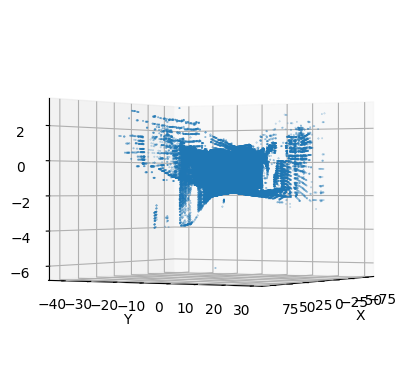

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Path to the .bin file
bin_file = '/content/drive/MyDrive/Colab Notebooks/188/stage3_testing/000000.bin'

# Load the point cloud data from the .bin file
points = np.fromfile(bin_file, dtype=np.float32).reshape(-1, 4)

# Extract X, Y, and Z coordinates
x = points[:, 0]
y = points[:, 1]
z = points[:, 2]

# Plot the point cloud
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, s=0.1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Rotate the image
ax.view_init(elev=0, azim=30)  # Adjust the elev and azim values to change the rotation

plt.show()


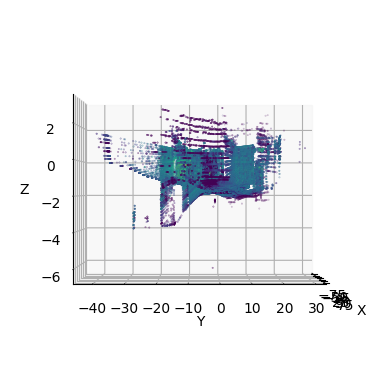

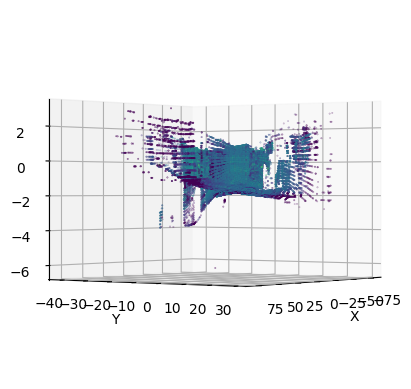

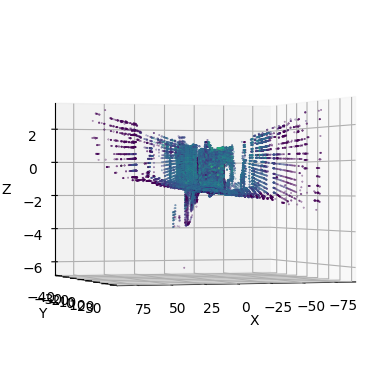

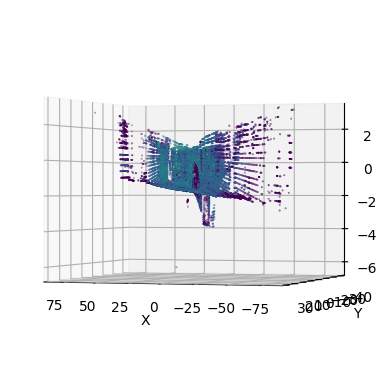

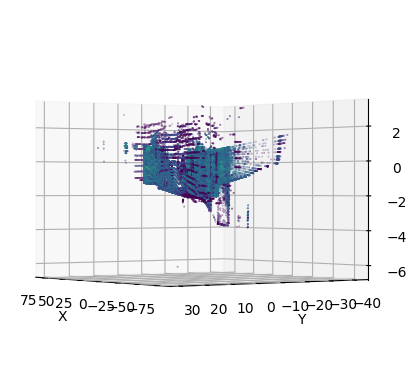

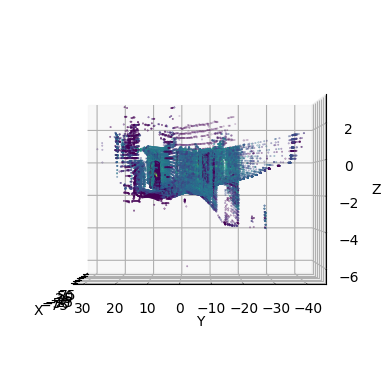

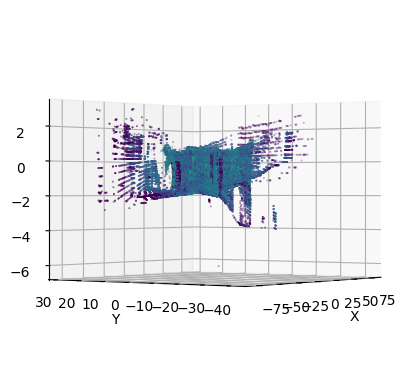

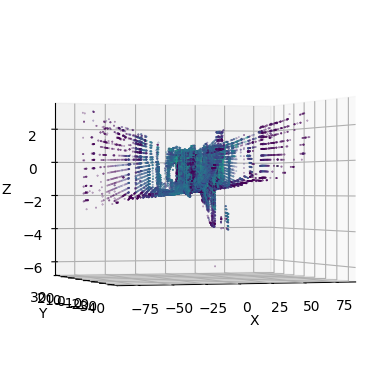

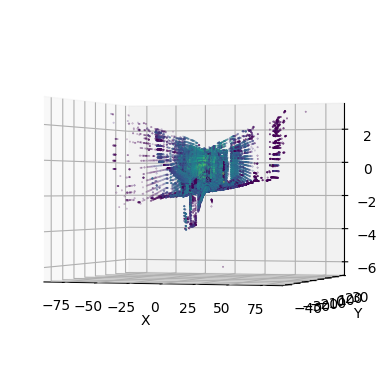

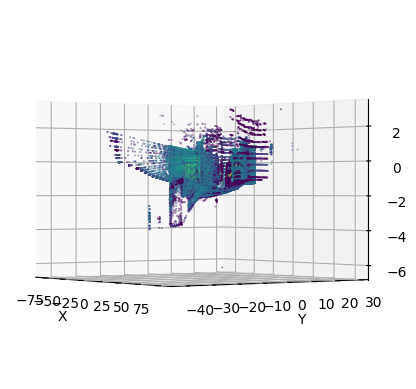

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Path to the .bin file
bin_file = '/content/drive/MyDrive/Colab Notebooks/188/stage3_testing/000000.bin'

# Load the point cloud data from the .bin file
points = np.fromfile(bin_file, dtype=np.float32).reshape(-1, 4)

# Extract X, Y, Z coordinates and intensity values
x = points[:, 0]
y = points[:, 1]
z = points[:, 2]
intensity = points[:, 3]

# Create a colormap based on intensity values
colormap = intensity / np.max(intensity)

for azim in range(10):
    # Plot the point cloud with color
    azim = azim * 360 / 10
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(x, y, z, c=colormap, s=0.1, cmap='viridis')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

    ax.view_init(elev=0, azim=azim)  # Adjust the elev and azim values to change the rotation
    plt.show()


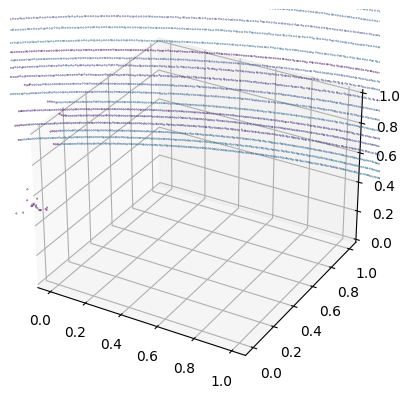

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation

# Path to the directory containing the .bin files
bin_dir = '/content/drive/MyDrive/Colab Notebooks/188/stage3_testing/'

# Number of frames to include in the movie
num_frames = 50

# Create a figure and 3D axes
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Initialize the scatter plot
scatter = ax.scatter([], [], [], s=0.1)

# Function to update the scatter plot for each frame
def update(frame):
    # Load the point cloud data from the .bin file
    bin_file = bin_dir + f'{frame:06d}.bin'
    points = np.fromfile(bin_file, dtype=np.float32).reshape(-1, 4)

    # Extract X, Y, Z coordinates and intensity values
    x = points[:, 0]
    y = points[:, 1]
    z = points[:, 2]
    intensity = points[:, 3]

    # Update the scatter plot data
    scatter.set_offsets(np.column_stack([x, y]))
    scatter._offsets3d = (x, y, z)  # Set the 3D offsets directly
    scatter.set_array(intensity)

    return scatter,

# Create the animation
animation = FuncAnimation(fig, update, frames=num_frames, interval=200, blit=True)

# Save the animation as a movie
output_file = '/content/drive/MyDrive/Colab Notebooks/188/movie.mp4'
animation.save(output_file, writer='ffmpeg')

# Display the animation
plt.show()


In [ ]:
%cd /content

/content


In [ ]:
%cd /content/drive/MyDrive

/content/drive/MyDrive


In [ ]:
from IPython.display import Image

# Path to the JPG file
jpg_file = '/content/drive/MyDrive/PXL_20221023_200659858.jpg'

# Display the image
Image(filename=jpg_file)


Output hidden; open in https://colab.research.google.com to view.